<a href="https://colab.research.google.com/github/tinayem01/zimbabwe-covid-forcast-lstm-model/blob/main/Zimbabwe_Multivariate_Covid_Forecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PmdArima**

In [ ]:
!pip install pmdarima

# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, model_selection
import pmdarima as p
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
import seaborn as sns

# **Read Data**

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/DataSets/zim-only-owid-covid-data.csv')
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ZWE,Africa,Zimbabwe,20/3/2020,1,1,NaN,NaN,NaN,NaN,0.067,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
1,ZWE,Africa,Zimbabwe,21/3/2020,3,2,NaN,NaN,NaN,NaN,0.202,0.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
2,ZWE,Africa,Zimbabwe,22/3/2020,3,0,NaN,NaN,NaN,NaN,0.202,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
3,ZWE,Africa,Zimbabwe,23/3/2020,3,0,NaN,1.0,1.0,NaN,0.202,0.000,NaN,0.067,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.37,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
4,ZWE,Africa,Zimbabwe,24/3/2020,3,0,NaN,1.0,0.0,NaN,0.202,0.000,NaN,0.067,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.48,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,ZWE,Africa,Zimbabwe,28/5/2021,38918,64,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1833.0,546389.0,36.762,0.123,1727.0,0.116,0.021,47.6,tests performed,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
435,ZWE,Africa,Zimbabwe,29/5/2021,38933,15,36.286,1594.0,2.0,1.143,2619.471,1.009,2.441,107.247,0.135,0.077,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2032.0,548421.0,36.899,0.137,1790.0,0.120,0.020,49.3,tests performed,1002465.0,666786.0,335679.0,25669.0,14056.0,6.74,4.49,2.26,946.0,NaN,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
436,ZWE,Africa,Zimbabwe,30/5/2021,38944,11,37.429,1594.0,0.0,1.143,2620.211,0.740,2.518,107.247,0.000,0.077,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011973.0,670755.0,341218.0,9508.0,14420.0,6.81,4.51,2.30,970.0,NaN,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
437,ZWE,Africa,Zimbabwe,31/5/2021,38961,17,37.857,1594.0,0.0,1.143,2

# **EDA**

In [ ]:
df = covid[['date','new_cases']]
df.index = df.date
df.index = pd.to_datetime(df.index, format= '%d/%m/%Y')
df = df.drop(columns = 'date')
df = df.loc[:'2021-05-31']
df

,new_cases
date,
2020-03-20,1
2020-03-21,2
2020-03-22,0
2020-03-23,0
2020-03-24,0
...,...
2021-05-27,35
2021-05-28,64
2021-05-29,15


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,438.0,88.952055,180.176953,-6.0,8.0,27.0,87.25,1365.0


## **Plots**

### **Line Plot**

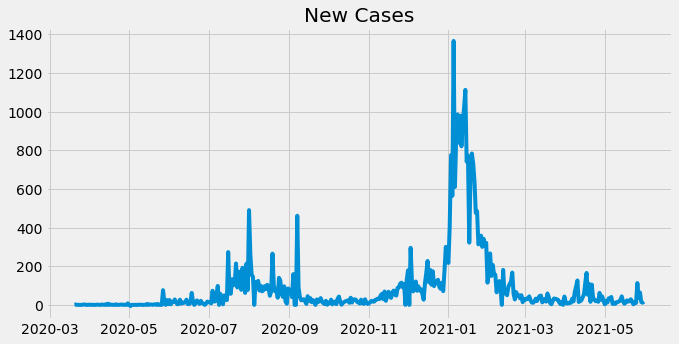

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,5)
fig, ax = plt.subplots()
ax.plot(df.new_cases)
ax.set_title('New Cases')
plt.show()

### **TSDisplay**

/usr/local/lib/python3.7/dist-packages/pmdarima/utils/visualization.py:222: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)


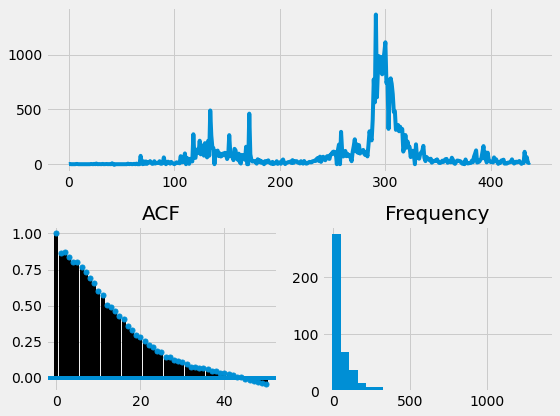

In [ ]:
p.tsdisplay(df)
plt.show()

### **Decompose Time Series**

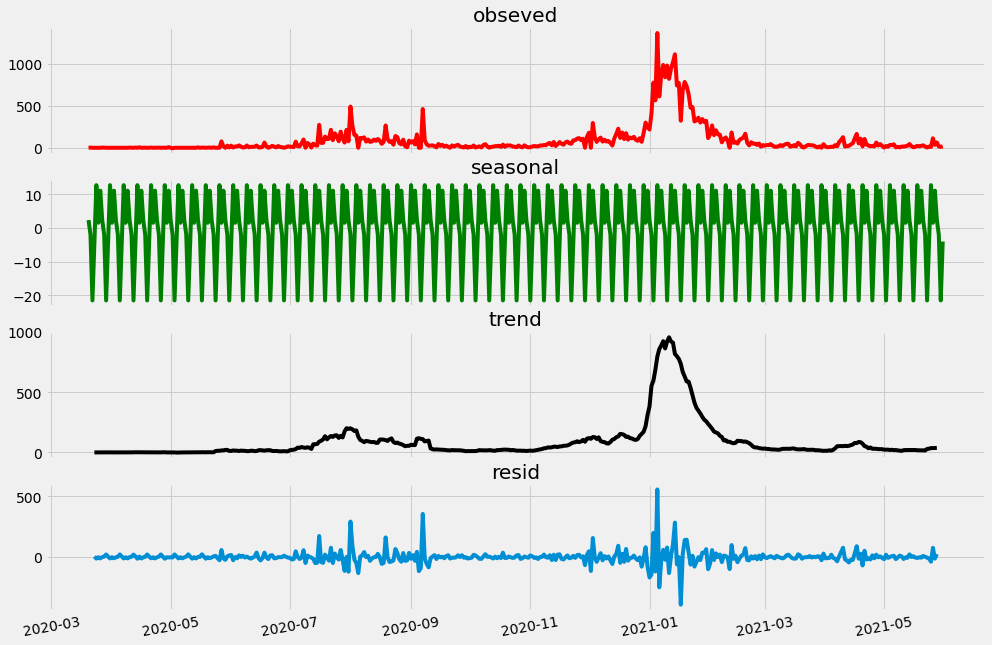

In [ ]:
decomposed = seasonal_decompose(df.new_cases,model = 'additive')
fig,(ax,ax1,ax2,ax3) = plt.subplots(4,sharex = True,figsize = (8,8),)
fig.set_size_inches(15,10)
ax.plot(decomposed.observed, color = 'red')
ax.set_title('obseved')
ax1.plot(decomposed.seasonal, color = 'green')
ax1.set_title('seasonal')
ax2.plot(decomposed.trend,color = 'black')
ax2.set_title('trend')
ax3.plot(decomposed.resid)
ax3.set_title('resid')
plt.xticks(rotation = 10)
plt.savefig('decomposed time series')
plt.show()

## **ARIMA TESTS**

In [ ]:
ADF = p.arima.stationarity.ADFTest()
ADF.should_diff(df.new_cases)

(0.15912490170119095, True)

# **Bench Mark Models**

## **ARIMA**

### **Model**

In [ ]:
arima = p.AutoARIMA(start_P= 0,start_q= 0,max_p=10,max_q=10,max_d=5,max_order=20)

In [ ]:
arima.fit(df.new_cases)

AutoARIMA(D=None, alpha=0.05, d=None, error_action='trace',
          information_criterion='aic', m=1, max_D=1, max_P=2, max_Q=2, max_d=5,
          max_order=20, max_p=10, max_q=10, maxiter=50, method='lbfgs',
          n_fits=10, n_jobs=1, offset_test_args=None, out_of_sample_size=0,
          random=False, random_state=None, scoring='mse', scoring_args=None,
          seasonal=True, seasonal_test='ocsb', seasonal_test_args=None,
          start_P=0, start_Q=1, start_p=2, start_params=None, ...)

In [ ]:
arima.model_

ARIMA(maxiter=50, method='lbfgs', order=(6, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

### **Predictions**

In [ ]:
forecast = arima.predict(61)

In [ ]:
forecast

array([23.53328348, 37.6017616 , 26.42395573, 26.236279  ,  9.22952515,
        8.39529879,  1.24355254,  8.32501296,  8.53512907, 16.3866315 ,
       14.55330756, 17.34791473, 12.23170677, 12.8370947 ,  8.87528653,
       11.07329681,  9.70591551, 12.82125715, 11.90158488, 13.87586221,
       12.11907585, 12.96999563, 11.17735282, 12.06506973, 11.01897678,
       12.22480738, 11.60987954, 12.62242781, 11.91825567, 12.52306578,
       11.755571  , 12.21216929, 11.63258303, 12.13439374, 11.75524621,
       12.22688094, 11.8968859 , 12.23963939, 11.90396923, 12.15366313,
       11.86666195, 12.09623274, 11.88572294, 12.10225295, 11.93483687,
       12.11055382, 11.95609332, 12.08949034, 11.95232002, 12.06441124,
       11.95531501, 12.05671564, 11.97051289, 12.05690253, 11.98257272,
       12.05134988, 11.9858269 , 12.04201847, 11.98752244, 12.03626773,
       11.99236485])

In [ ]:
base = pd.to_datetime('31/05/2021',format='%d/%m/%Y')
numdays = len(forecast) 
date_list = [base + datetime.timedelta(days=x) for x in range(1,numdays + 1)]
date_list = np.array(date_list)
date_list

array([Timestamp('2021-06-01 00:00:00'), Timestamp('2021-06-02 00:00:00'),
       Timestamp('2021-06-03 00:00:00'), Timestamp('2021-06-04 00:00:00'),
       Timestamp('2021-06-05 00:00:00'), Timestamp('2021-06-06 00:00:00'),
       Timestamp('2021-06-07 00:00:00'), Timestamp('2021-06-08 00:00:00'),
       Timestamp('2021-06-09 00:00:00'), Timestamp('2021-06-10 00:00:00'),
       Timestamp('2021-06-11 00:00:00'), Timestamp('2021-06-12 00:00:00'),
       Timestamp('2021-06-13 00:00:00'), Timestamp('2021-06-14 00:00:00'),
       Timestamp('2021-06-15 00:00:00'), Timestamp('2021-06-16 00:00:00'),
       Timestamp('2021-06-17 00:00:00'), Timestamp('2021-06-18 00:00:00'),
       Timestamp('2021-06-19 00:00:00'), Timestamp('2021-06-20 00:00:00'),
       Timestamp('2021-06-21 00:00:00'), Timestamp('2021-06-22 00:00:00'),
       Timestamp('2021-06-23 00:00:00'), Timestamp('2021-06-24 00:00:00'),
       Timestamp('2021-06-25 00:00:00'), Timestamp('2021-06-26 00:00:00'),
       Timestamp('2021-06

In [ ]:
predictions = pd.DataFrame(np.int32(forecast), columns = ['new_cases'])
predictions.index = date_list
predictions.head(8)

,new_cases
2021-06-01,23
2021-06-02,37
2021-06-03,26
2021-06-04,26
2021-06-05,9
2021-06-06,8
2021-06-07,1
2021-06-08,8


In [ ]:
arima_combined = pd.concat([df,predictions])
arima_combined

,new_cases
2020-03-20,1
2020-03-21,2
2020-03-22,0
2020-03-23,0
2020-03-24,0
...,...
2021-07-27,11
2021-07-28,12
2021-07-29,11
2021-07-30,12


In [ ]:
arima_combined.loc[:'2021-05-31','label'] = 'observed'
arima_combined.loc['2021-06-01':,'label'] = 'predicted'
arima_combined

,new_cases,label
2020-03-20,1,observed
2020-03-21,2,observed
2020-03-22,0,observed
2020-03-23,0,observed
2020-03-24,0,observed
...,...,...
2021-07-27,11,predicted
2021-07-28,12,predicted
2021-07-29,11,predicted
2021-07-30,12,predicted


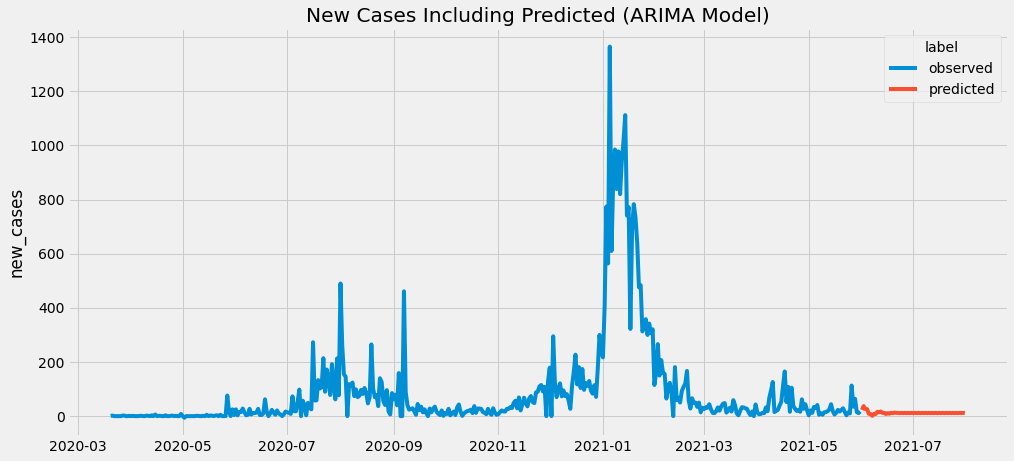

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(15,7)
sns.lineplot(x = arima_combined.index,y = arima_combined.new_cases,hue = arima_combined.label,ax = ax)
ax.set_title("New Cases Including Predicted (ARIMA Model)")
plt.show()

# **Data For LSTM**

## **Model Data Class**

In [ ]:
class ModelData:
  """
  Uses the window method to create multivariate time series training data
  """
  def __init__(self, df: pd.DataFrame,features_time_steps = 5, labels_time_steps = 3, date_column: str = 'date',columns:list = ['new_cases','new_vaccinations',
                                       'stringency_index','new_tests','people_vaccinated']):
    """
    Parameters:
      df: where features and labels are extracted
      features_time_steps: previous time steps to be used to predict the future
      labels_time_steps: the number of time points in the future to be forecasted
      date_column: the date column to be used as the index of the time series
      columns: the columns to be used as multivariate features in the model
    """
    self.df = df
    self.date_column = date_column
    self.columns = columns
    self.features_time_steps = features_time_steps
    self.labels_time_steps = labels_time_steps
  
  def preprocess_data(self,test_data = False):
    """
    Imputes missing values with 0 and sets the date column as the index.
    If test data is set to False, it creates xtrain
    If test data is set to True, it creates data used to predict June and July cases
    """
    data = self.df[self.columns]
    data.index = pd.to_datetime(self.df[self.date_column],format='%d/%m/%Y')
    data = data.loc[:'2021-05-31']
    data = data.fillna(0)
    if test_data:
      return data.tail(self.features_time_steps)
    else:
      return data
  
  def _transform_features_input(self,array = None,transformer = preprocessing.MinMaxScaler(),transform = False):
    data = self.preprocess_data()
    transformed_data = transformer.fit_transform(data)
    if transform:
      return transformer.transform(array)
    else:
      return transformed_data
  
  def transform_labels(self,array = None,transformer = preprocessing.MinMaxScaler(),inverse_transform = False):
    data = self.preprocess_data()
    transformed_data = transformer.fit_transform(data[['new_cases']].values)
    if inverse_transform:
      return transformer.inverse_transform(array)
    else:
      return transformed_data
  
  def _create_supervised_features(self):
    data = self._transform_features_input()
    x = []
    for i in range(len(data)):
      if i + self.features_time_steps + self.labels_time_steps > len(data):
        break
    
      seq_x = data[i : i + self.features_time_steps]
      x.append(seq_x)
    x = np.array(x)
    return x

  def create_test_data(self):
    data = self.preprocess_data(test_data = True)
    data = self._transform_features_input(data,transform = True)
    x = []
    for i in range(len(data)):
      if i + self.features_time_steps > len(data):
        break
      
      seq_x = data[i : i + self.features_time_steps]
      x.append(seq_x)
    x = np.array(x)
    return x

  
  def create_supervised_labels(self):
    data = self.transform_labels()
    y = []
    for i in range(len(data)):
      if i + self.features_time_steps + self.labels_time_steps > len(data):
        break

      seq_y = data[i + self.features_time_steps : i + self.features_time_steps + self.labels_time_steps,0]
      y.append(seq_y)
    y = np.array(y)
    return y

  def create_supervised_input(self):
    return self._create_supervised_features(), self.create_supervised_labels(),self.create_test_data()

## **Instantiate Model Data**

In [ ]:
train_x,train_y,xtest = ModelData(covid,features_time_steps=60,labels_time_steps=60).create_supervised_input()
xtrain,xval,ytrain,yval = model_selection.train_test_split(train_x,train_y,random_state = 123,test_size = 0.25)
train_x.shape,train_y.shape,xtrain.shape,ytrain.shape,xtest.shape,xval.shape, yval.shape

((319, 60, 5),
 (319, 60),
 (239, 60, 5),
 (239, 60),
 (1, 60, 5),
 (80, 60, 5),
 (80, 60))

# **LSTM Model**

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 240, return_sequences=True,input_shape = (xtrain.shape[1],xtrain.shape[2]))),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 240, return_sequences=True)),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 240, return_sequences=True)),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 180, return_sequences=True)),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 120)),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(units = 60,activation='relu')
])

model.compile('adam','mean_squared_error',['mae'])

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DataSets/Keras Models/mv_covid_new_cases_train.hdf5',monitor = 'val_loss',verbose = 1,save_best_only=True)

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 2000,batch_size=32, validation_data=(xval,yval), callbacks=[mc],)

Streaming output truncated to the last 5000 lines.
Epoch 751/2000
8/8 [==============================] - 0s 61ms/step - loss: 0.0124 - mae: 0.0625 - val_loss: 0.0147 - val_mae: 0.0598

Epoch 00751: val_loss did not improve from 0.00335
Epoch 752/2000
8/8 [==============================] - 0s 59ms/step - loss: 0.0153 - mae: 0.0642 - val_loss: 0.0118 - val_mae: 0.0658

Epoch 00752: val_loss did not improve from 0.00335
Epoch 753/2000
8/8 [==============================] - 0s 61ms/step - loss: 0.0123 - mae: 0.0696 - val_loss: 0.0137 - val_mae: 0.0644

Epoch 00753: val_loss did not improve from 0.00335
Epoch 754/2000
8/8 [==============================] - 0s 59ms/step - loss: 0.0126 - mae: 0.0615 - val_loss: 0.0121 - val_mae: 0.0625

Epoch 00754: val_loss did not improve from 0.00335
Epoch 755/2000
8/8 [==============================] - 0s 62ms/step - loss: 0.0110 - mae: 0.0626 - val_loss: 0.0111 - val_mae: 0.0563

Epoch 00755: val_loss did not improve from 0.00335
Epoch 756/2000
8/8 [====

## **Model Evaluation**

In [ ]:
hist_df = pd.DataFrame(hist.history)
hist_df.head()

,loss,mae,val_loss,val_mae
0,0.028575,0.094038,0.022018,0.074638
1,0.023923,0.085996,0.019447,0.075197
2,0.021791,0.080650,0.017506,0.067755
3,0.019172,0.079748,0.015969,0.072010
4,0.018510,0.079262,0.015290,0.069902


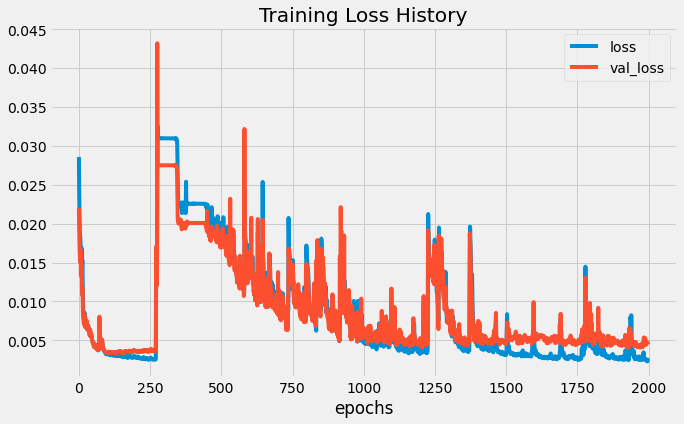

In [ ]:
plt.style.use('fivethirtyeight')
hist_df[['loss','val_loss']].plot(figsize = (10,6),title = 'Training Loss History',xlabel = 'epochs')
plt.savefig('/content/drive/MyDrive/DataSets/Keras Models/training_loss_history.png')
plt.show()

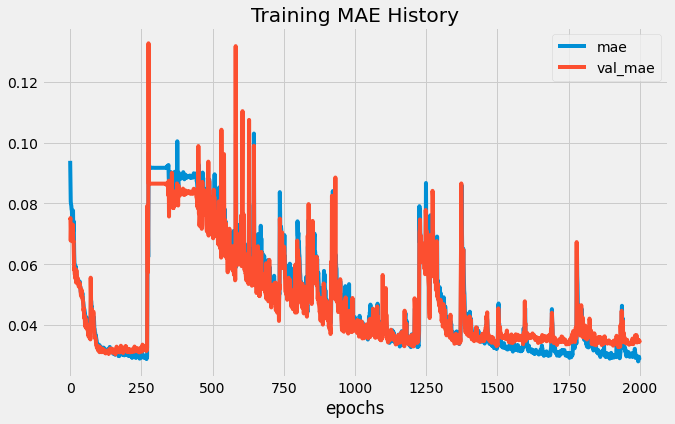

In [ ]:
plt.style.use('fivethirtyeight')
hist_df[['mae','val_mae']].plot(figsize = (10,6),title = 'Training MAE History',xlabel = 'epochs')
plt.savefig('/content/drive/MyDrive/DataSets/Keras Models/training_mae_history.png')
plt.show()

In [ ]:
full_model = tf.keras.models.load_model('/content/drive/MyDrive/DataSets/Keras Models/mv_covid_new_cases_train.hdf5')

In [ ]:
train_pred = full_model.predict(xtrain)

In [ ]:
r2_score = metrics.r2_score(ytrain,train_pred)
print(f'The Coefficient of Determonation for this model is: {np.round(r2_score * 100,4)}%')

The Coefficient of Determonation for this model is: 88.5457%


# **Train Final Model**

## **Model**

In [ ]:
mc_ = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DataSets/Keras Models/mv_covid_new_cases.hdf5',monitor = 'loss',verbose = 1,save_best_only=True)

In [ ]:
hist_ = model.fit(train_x,train_y,epochs = 2000,batch_size=32, callbacks=[mc_])

Streaming output truncated to the last 5000 lines.
Epoch 750/2000
10/10 [==============================] - 1s 54ms/step - loss: 0.0018 - mae: 0.0258

Epoch 00750: loss did not improve from 0.00158
Epoch 751/2000
10/10 [==============================] - 1s 55ms/step - loss: 0.0016 - mae: 0.0248

Epoch 00751: loss improved from 0.00158 to 0.00157, saving model to /content/drive/MyDrive/DataSets/Keras Models/mv_covid_new_cases.hdf5
Epoch 752/2000
10/10 [==============================] - 1s 57ms/step - loss: 0.0016 - mae: 0.0252

Epoch 00752: loss did not improve from 0.00157
Epoch 753/2000
10/10 [==============================] - 1s 55ms/step - loss: 0.0016 - mae: 0.0252

Epoch 00753: loss did not improve from 0.00157
Epoch 754/2000
10/10 [==============================] - 1s 54ms/step - loss: 0.0016 - mae: 0.0249

Epoch 00754: loss did not improve from 0.00157
Epoch 755/2000
10/10 [==============================] - 1s 56ms/step - loss: 0.0016 - mae: 0.0245

Epoch 00755: loss improved fro

## **Predictions**

In [ ]:
final_model = tf.keras.models.load_model('/content/drive/MyDrive/DataSets/Keras Models/mv_covid_new_cases.hdf5')

In [ ]:
june_july_predictions_array = final_model.predict(xtest)

In [ ]:
june_july_predictions_array

array([[0.05917378, 0.06680971, 0.0318951 , 0.03041613, 0.02911007,
        0.01813283, 0.02434379, 0.03140701, 0.02838827, 0.02703515,
        0.04123194, 0.04621936, 0.03400024, 0.03119941, 0.04615391,
        0.05601825, 0.04393343, 0.06232998, 0.04461008, 0.03688622,
        0.03790418, 0.02709668, 0.02476651, 0.01859608, 0.0208061 ,
        0.02767878, 0.01641304, 0.01343598, 0.01003835, 0.00763299,
        0.01306356, 0.01061996, 0.0145583 , 0.00961412, 0.00748608,
        0.00809119, 0.00705522, 0.00591598, 0.00897962, 0.00802623,
        0.00570501, 0.01269201, 0.00850866, 0.01601063, 0.00939988,
        0.01561461, 0.01430905, 0.01408482, 0.01157033, 0.01441393,
        0.01886725, 0.02240352, 0.02791324, 0.02574326, 0.02934734,
        0.02823585, 0.02984479, 0.0381234 , 0.04522171, 0.03862292]],
      dtype=float32)

## **Inverse Transform Predictions**

In [ ]:
def fix_preds(x):
  if x < 0:
    return 0
  else:
    return int(x)

In [ ]:
dates = list(date_list)
dates.pop(0)

Timestamp('2021-06-01 00:00:00')

In [ ]:
model_data_object = ModelData(covid,features_time_steps=60,labels_time_steps=60)
june_july_predictions = model_data_object.transform_labels(array = june_july_predictions_array,inverse_transform = True)
june_july_predictions = pd.DataFrame(june_july_predictions).T
june_july_predictions = pd.DataFrame(june_july_predictions.iloc[:,0].apply(fix_preds))
june_july_predictions.index = dates
june_july_predictions.columns = ['new_cases']
june_july_predictions.head()

,new_cases
2021-06-02,75
2021-06-03,85
2021-06-04,37
2021-06-05,35
2021-06-06,33


In [ ]:
covid_new_cases = covid[['new_cases']]
covid_new_cases.index = pd.to_datetime(covid.date, format= '%d/%m/%Y')
covid_new_cases

,new_cases
date,
2020-03-20,1
2020-03-21,2
2020-03-22,0
2020-03-23,0
2020-03-24,0
...,...
2021-05-28,64
2021-05-29,15
2021-05-30,11


In [ ]:
combined = pd.concat([covid_new_cases,june_july_predictions])
combined.loc[:'2021-06-01','label'] = 'observed'
combined.loc['2021-06-02':,'label'] = 'predicted'
combined

,new_cases,label
2020-03-20,1,observed
2020-03-21,2,observed
2020-03-22,0,observed
2020-03-23,0,observed
2020-03-24,0,observed
...,...,...
2021-07-27,32,predicted
2021-07-28,34,predicted
2021-07-29,46,predicted
2021-07-30,55,predicted


## **Plot**

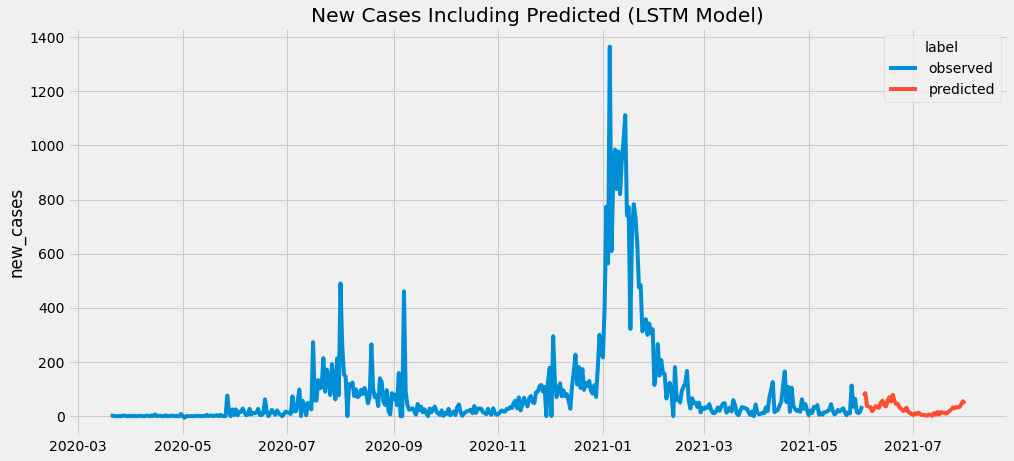

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(15,7)
sns.lineplot(x = combined.index,y = combined.new_cases,hue = combined.label,ax = ax)
ax.set_title("New Cases Including Predicted (LSTM Model)")
plt.show()